# Advanced `value_counts()`
**Analyzing the relationship of someone's Title on their survival chance during the sinking of the Titanic, using the `AdvancedValueCounts` class**

Make sure advanced-value-counts is installed

In [ ]:
%pip install advanced-value-counts

Import the `AdvancedValueCounts` class and pandas

In [1]:
from advanced_value_counts.avc import AdvancedValueCounts
import pandas as pd

**Read in a [modified version](https://github.com/sTomerG/advanced-value-counts/tree/main/tests/data) of the [Titanic data set from Kaggle](https://www.kaggle.com/c/titanic).**

In [2]:
df = pd.read_csv('../tests/data/titanic.csv', usecols=['Survived','Title']) #https://github.com/sTomerG/advanced-value-counts/tree/main/tests/data
df

,Survived,Title
0,0,Mr.
1,1,Mrs.
2,1,Miss.
3,1,Mrs.
4,0,Mr.
...,...,...
886,0,Rev.
887,1,Miss.
888,0,Miss.
889,1,Mr.


**Using pandas' `.group_by()` and `.value_counts()` to analyze the impact of someone's Title on survival chance, we get the following result:**

In [3]:
df.groupby('Survived')['Title'].value_counts(dropna=False, normalize=True).to_frame()

Title
Survived Title              
0        Mr.        0.794171
         Miss.      0.100182
         Mrs.       0.047359
         Master.    0.030965
         Rev.       0.010929
         NaN        0.007286
         Capt.      0.001821
         Col.       0.001821
         Don.       0.001821
         Jonkheer.  0.001821
         Major.     0.001821
1        Miss.      0.371345
         Mrs.       0.289474
         Mr.        0.236842
         Master.    0.067251
         NaN        0.008772
         Mlle.      0.005848
         Col.       0.002924
         Countess.  0.002924
         Lady.      0.002924
         Major.     0.002924
         Mme.       0.002924
         Ms.        0.002924
         Sir.       0.002924

**From this data, we can e.g. conclude that of all passengers who passed away, ~79% were 'Mr', while of the survivors only ~23% were 'Mr'.**

**However, we would need to write more code to answer the following questions:**
- How many passengers were there in total?
  - `len(df)`
- How many passengers survived and how many passed away?
  - `df['Survived'].value_counts(dropna=False)`
- What percentage of passengers survived and what percentage passed away?
  - `df['Survived'].value_counts(normalize=True, dropna=False)`
- How many passengers had the title 'Mrs'?
  - `df['Title'].value_counts()`
- What percentage of passengers had the title 'Mrs'?
  - `df['Title'].value_counts(normalize=True, dropna=False)`
- How many passengers who passed away had the title 'Mrs'?
  - `df.groupby('Survived')['Title'].value_counts()`
- What percentage of passengers had the title 'Mrs' and passed away?
  - `df.groupby('Survived')['Title'].value_counts(dropna=False) / len(df)`
- How does the percentage of passengers that had the title 'Mrs' and passed away compare to the overall amount of passengers with the title 'Mrs'?
  - `(df.groupby('Survived')['Title'].value_counts(dropna=False) / len(df)).loc['Mrs.'] - df['Title'].value_counts(normalize=True, dropna=False).loc['Mrs.']`


**Using the `AdvancedValueCounts` class of the advanced-value-counts package, all these questions can be answered with two lines of code:**

In [4]:
avc = AdvancedValueCounts(df, groupby_col='Survived', column='Title')
avc.avc_df.sort_values(['Survived','count'], ascending=[True, False])

count  subgroup_ratio  subgr_r_diff_subgr_all  r_vs_total
Survived Title                                                               
0        _total       549        1.000000                0.000000    0.616162
         Mr.          436        0.794171                0.213924    0.489338
         Miss.         55        0.100182               -0.104083    0.061728
         Mrs.          26        0.047359               -0.092933    0.029181
         Master.       17        0.030965               -0.013928    0.019080
         Rev.           6        0.010929                0.004195    0.006734
         _na            4        0.007286               -0.000570    0.004489
         Capt.          1        0.001821                0.000699    0.001122
         Col.           1        0.001821               -0.000423    0.001122
         Don.           1        0.001821                0.000699    0.001122
         Jonkheer.      1        0.001821                0.000699    0.001122
         Major.         1        0.001821               -0.000423    0.001122
1        _total       342        1.000000                0.000000    0.383838
         Miss.        127        0.371345                0.167080    0.142536
         Mrs.          99        0.289474                0.149182    0.111111
         Mr.           81        0.236842               -0.343405    0.090909
         Master.       23        0.067251                0.022358    0.025814
         _na            3        0.008772                0.000916    0.003367
         Mlle.          2        0.005848                0.003603    0.002245
         Col.           1        0.002924                0.000679    0.001122
         Countess.      1        0.002924                0.001802    0.001122
         Lady.          1        0.002924                0.001802    0.001122
         Major.         1        0.002924                0.000679    0.001122
         Mme.           1        0.002924                0.001802    0.001122
         Ms.            1        0.002924                0.001802    0.001122
         Sir.           1        0.002924                0.001802    0.001122
_all     _total       891        1.000000                     NaN    1.000000
         Mr.          517        0.580247                     NaN    0.580247
         Miss.        182        0.204265                     NaN    0.204265
         Mrs.         125        0.140292                     NaN    0.140292
         Master.       40        0.044893                     NaN    0.044893
         _na            7        0.007856                     NaN    0.007856
         Rev.           6        0.006734                     NaN    0.006734
         Col.           2        0.002245                     NaN    0.002245
         Major.         2        0.002245                     NaN    0.002245
         Mlle.          2        0.002245                     NaN    0.002245
         Capt.          1        0.001122                     NaN    0.001122
         Countess.      1        0.001122                     NaN    0.001122
         Don.           1        0.001122                     NaN    0.001122
         Jonkheer.      1        0.001122                     NaN    0.001122
         Lady.          1        0.001122                     NaN    0.001122
         Mme.           1        0.001122                     NaN    0.001122
         Ms.            1        0.001122                     NaN    0.001122
         Sir.           1        0.001122                     NaN    0.001122

**However, just as with the first displayed DataFrame with the grouped-by `value_counts()` of pandas, the data is a bit messy because of the small counts. That's why `AdvancedValueCounts` has many parameters to group smaller groups together:**

In [5]:
# for groupby_col:
dropna: bool = False
max_groups: int = None # does not effect NA or the '_other' group
min_group_count: int = 1 # does not effect NA or the '_other' group
min_group_ratio: float = 0 # does not effect NA or the '_other' group

# for column:
dropna: bool = False
max_subgroups: int = None # does not effect NA or the '_other' group
min_subgroup_count: int = 1 # does not effect NA or the '_other' group
min_subgroup_ratio: float = 0 # does not effect NA or the '_other' group
min_subgroup_ratio_vs_total: float = 0 # does not effect NA or the '_other' group

**We can easily set the min_subgroup_count to 5 to group the Titles with a frequency of less than 5 for each survival status to a group called `'_other'`**

In [6]:
avc.min_subgroup_count = 5
avc.avc_df

count  subgroup_ratio  subgr_r_diff_subgr_all  r_vs_total
Survived Title                                                             
0        Master.     17        0.030965               -0.013928    0.019080
         Miss.       55        0.100182               -0.104083    0.061728
         Mr.        436        0.794171                0.213924    0.489338
         Mrs.        26        0.047359               -0.092933    0.029181
         Rev.         6        0.010929                0.004195    0.006734
         _na          4        0.007286               -0.000570    0.004489
         _other       5        0.009107               -0.006605    0.005612
         _total     549        1.000000                0.000000    0.616162
1        Master.     23        0.067251                0.022358    0.025814
         Miss.      127        0.371345                0.167080    0.142536
         Mr.         81        0.236842               -0.343405    0.090909
         Mrs.        99        0.289474                0.149182    0.111111
         _na          3        0.008772                0.000916    0.003367
         _other       9        0.026316                0.010603    0.010101
         _total     342        1.000000                0.000000    0.383838
_all     Master.     40        0.044893                     NaN    0.044893
         Miss.      182        0.204265                     NaN    0.204265
         Mr.        517        0.580247                     NaN    0.580247
         Mrs.       125        0.140292                     NaN    0.140292
         Rev.         6        0.006734                     NaN    0.006734
         _na          7        0.007856                     NaN    0.007856
         _other      14        0.015713                     NaN    0.015713
         _total     891        1.000000                     NaN    1.000000

**Now the data set is much more easy to read and the following information was added by the `AdvancedValueClass` compared to the previously displayed normal `.value_counts(normalize=True)`:**
- The total amount of passengers:
  - See index `'Survived'` == `'_all'`, index `'Title'` == `'_total'` and then the `'count'` column
- The total amount of passengers that survived and passed away:
  - See index `'Title'` == `'_total'` and then the `'count'` column
- What percentage of passengers survived and passed away:
  - See index `'Title'` == `'_total'` and then the `'r_vs_total'` column
- How many passengers had the title 'Mrs':
  - See index `'Survived'` == `'_all'`, index `'Title'` == `'Mrs.'` and then the `'count'` column
- What percentage of passengers had the title 'Mrs':
  - See index `'Survived'` == `'_all'`, index `'Title'` == `'Mrs.'` and then either the `'subgroup_ratio'` or the `'r_vs_total'` column
- How many passengers who passed away had the title 'Mrs':
  - See index `'Survived'` == `0`, index `'Title'` == `'Mrs.'` and then the `'count'` column
- What percentage of passengers had the title 'Mrs' and passed away:
  - See index `'Survived'` == `0`, index `'Title'` == `'Mrs.'` and then the `'r_vs_total'` column
- How does the percentage of passengers that had the title 'Mrs' and passed away compare to the overall amount of passengers with the title 'Mrs'?
  - See index `'Survived'` == `0`, index `'Title'` == `'Mrs.'` and then the `'subgr_r_diff_subgr_all'` column

**Like to have a visual representation too? One line of code does the work for you:**

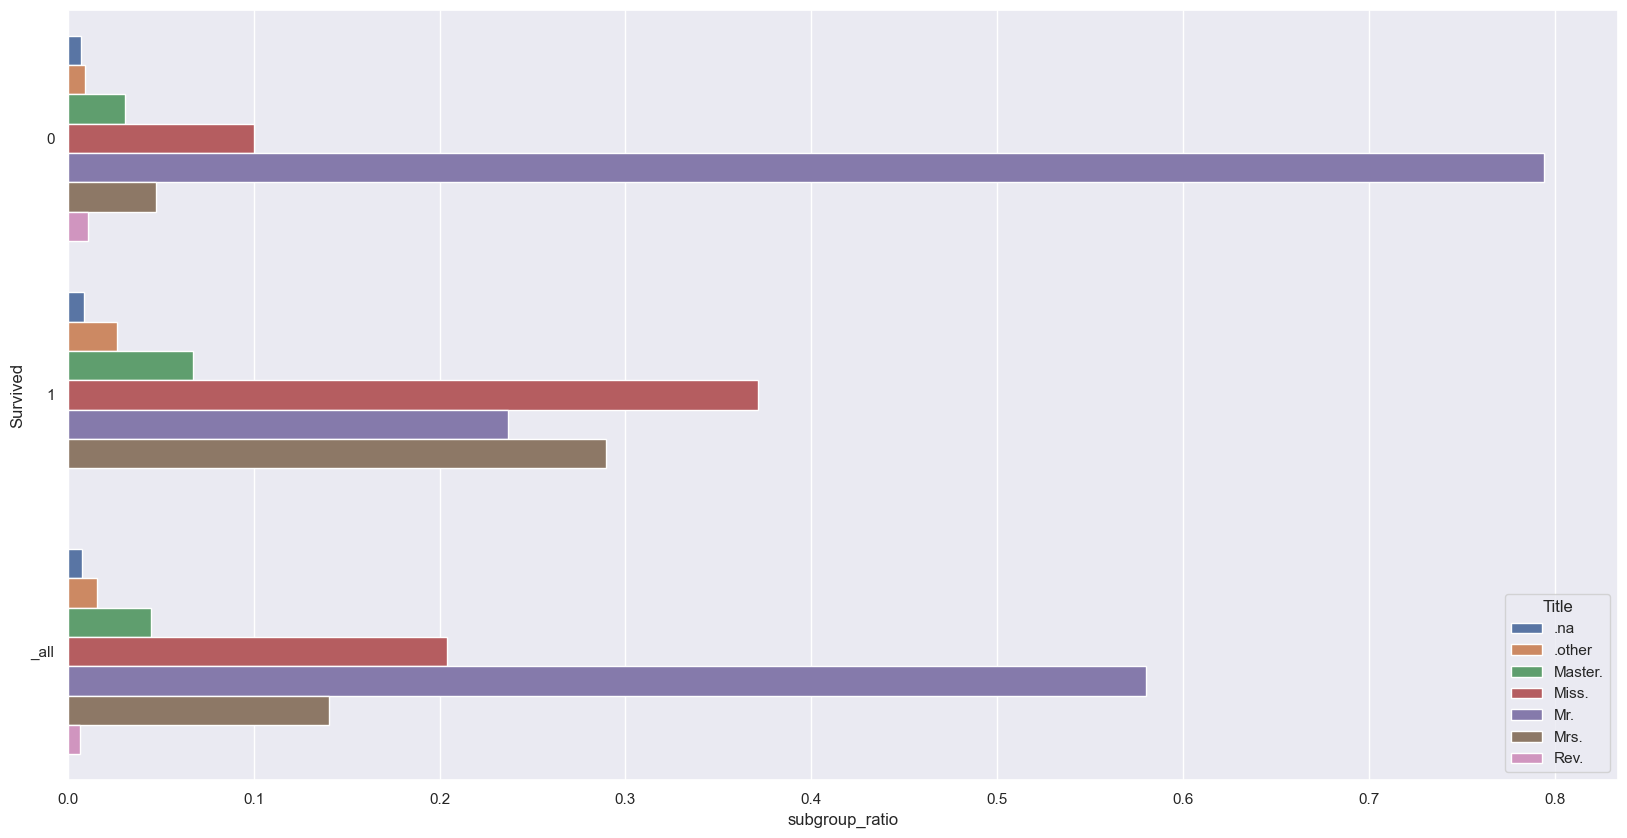

In [7]:
avc.get_plot(normalize=True) # normalize=True is also the default value

**Forgot what parameter values you are using?**

In [8]:
print(avc)

Settings:
              column: Title,
              groupby_col: Survived
              dropna: False
              max_groups: None
              min_group_ratio: 0
              min_group_count: 1
              max_subgroups: None
              min_subgroup_ratio: 0
              min_subgroup_count: 5
              min_subgroup_ratio_vs_total: 0
              round_ratio: None
              

              AdvancedValueCounts DataFrame:
                                count  subgroup_ratio  subgr_r_diff_subgr_all  r_vs_total
Survived Title                                                             
0        Master.     17        0.030965               -0.013928    0.019080
         Miss.       55        0.100182               -0.104083    0.061728
         Mr.        436        0.794171                0.213924    0.489338
         Mrs.        26        0.047359               -0.092933    0.029181
         Rev.         6        0.010929                0.004195    0.006734
         _